In [12]:
import pandas as pd
import numpy as np
protein = pd.read_table('protein.txt', sep='\t')
protein.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [13]:
protein.describe()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.828000,7.896000,2.936000,17.112000,4.284000,32.248000,4.276000,3.072000,4.136000
std,3.347078,3.694081,1.117617,7.105416,3.402533,10.974786,1.634085,1.985682,1.803903
min,4.400000,1.400000,0.500000,4.900000,0.200000,18.600000,0.600000,0.700000,1.400000
25%,7.800000,4.900000,2.700000,11.100000,2.100000,24.300000,3.100000,1.500000,2.900000
50%,9.500000,7.800000,2.900000,17.600000,3.400000,28.000000,4.700000,2.400000,3.800000
75%,10.600000,10.800000,3.700000,23.300000,5.800000,40.100000,5.700000,4.700000,4.900000
max,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000


In [14]:
protein.shape

(25, 10)

In [15]:
sprotein = protein.drop(['Country'], axis=1)
sprotein.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [16]:
from sklearn import preprocessing

sprotein_scaled = preprocessing.scale(sprotein)
sprotein_scaled

array([[ 0.08294065, -1.79475017, -2.22458425, -1.1795703 , -1.22503282,
         0.9348045 , -2.29596509,  1.24796771, -1.37825141],
       [-0.28297397,  1.68644628,  1.24562107,  0.40046785, -0.6551106 ,
        -0.39505069, -0.42221774, -0.91079027,  0.09278868],
       [ 1.11969872,  0.38790475,  1.06297868,  0.05573225,  0.06479116,
        -0.5252463 ,  0.88940541, -0.49959828, -0.07694671],
       [-0.6183957 , -0.52383718, -1.22005113, -1.2657542 , -0.92507375,
         2.27395937, -1.98367386,  0.32278572,  0.03621022],
       [-0.03903089,  0.96810416, -0.12419682, -0.6624669 , -0.6851065 ,
         0.19082957,  0.45219769, -1.01358827, -0.07694671],
       [ 0.23540507,  0.8023329 ,  0.69769391,  1.13303099,  1.68457011,
        -0.96233157,  0.3272812 , -1.21918427, -0.98220215],
       [-0.43543839,  1.02336124,  0.69769391, -0.86356267,  0.33475432,
        -0.71124003,  1.38907137, -1.16778527, -0.30326057],
       [-0.10001666, -0.82775116, -0.21551801,  2.38269753,  0

In [17]:
from sklearn.cluster import KMeans

NumberOfClusters = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in NumberOfClusters]
score = [kmeans[i].fit(sprotein_scaled).score(sprotein_scaled) for i in range(len(kmeans))]
score

[-225.0,
 -139.50737044831814,
 -128.6238715587469,
 -93.48718655095915,
 -77.66605294476076,
 -66.12448649973427,
 -56.044428035554645,
 -54.35468865657862,
 -42.64058333740464,
 -35.81870543569127,
 -35.369676342530774,
 -27.736424991403247,
 -27.627401408698272,
 -23.429003108358692,
 -18.151918303411794,
 -14.863629074393273,
 -12.868360904898854,
 -9.234866081359748,
 -6.704106008601116]

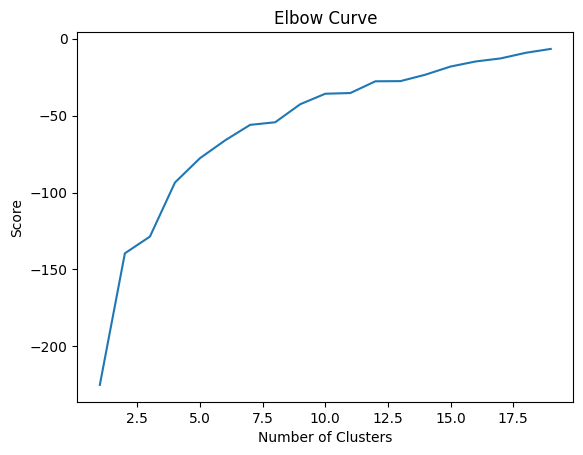

In [18]:
import matplotlib.pyplot as plt

plt.plot(NumberOfClusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [19]:
myKMeans = KMeans(algorithm='elkan',
                  n_clusters=5,
                  n_init=10,
                  max_iter=200,
                  verbose=1,).fit(sprotein_scaled)

Initialization complete
Iteration 0, inertia 104.51597704768997
Iteration 1, inertia 78.51215386305819
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 141.07454037795534
Iteration 1, inertia 77.66880706296641
Iteration 2, inertia 74.94105991048843
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 123.8770223153171
Iteration 1, inertia 77.23914668677904
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 112.53643220163389
Iteration 1, inertia 77.23914668677904
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 120.8681282362499
Iteration 1, inertia 78.87828063733372
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 115.88833147638198
Iteration 1, inertia 78.95133956934238
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 156.9753641759272
Iterat

In [20]:
myKMeans

KMeans(algorithm='elkan', max_iter=200, n_clusters=5, n_init=10, verbose=1)

In [21]:
y_kmeans = myKMeans.predict(sprotein)
print(y_kmeans)

[3 4 4 3 0 2 4 2 4 3 3 4 3 4 2 0 1 3 1 2 4 4 3 4 3]


/Users/jiangcheng/miniconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [22]:
protein['所隶属的类簇'] = y_kmeans
protein

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,所隶属的类簇
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,3
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,4
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,4
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,3
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,2
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,4
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,2
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,4
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5,3


In [26]:
protein

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,所隶属的类簇
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,3
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,4
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,4
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,3
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,2
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,4
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,2
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,4
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5,3


In [30]:
from sklearn.manifold import TSNE
from sklearn import manifold
from numpy import unique, where

In [31]:
clusters = unique(y_kmeans)
clusters

array([0, 1, 2, 3, 4], dtype=int32)

In [36]:
method1 = TSNE(random_state=0, perplexity=5)
help(TSNE)

Help on class TSNE in module sklearn.manifold._t_sne:

class TSNE(sklearn.base.ClassNamePrefixFeaturesOutMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  TSNE(n_components=2, *, perplexity=30.0, early_exaggeration=12.0, learning_rate='auto', n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', metric_params=None, init='pca', verbose=0, random_state=None, method='barnes_hut', angle=0.5, n_jobs=None)
 |  
 |  T-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  

In [37]:
sprotein_scaled.shape

(25, 9)

Text(0.5, 1.0, 'TSNE')

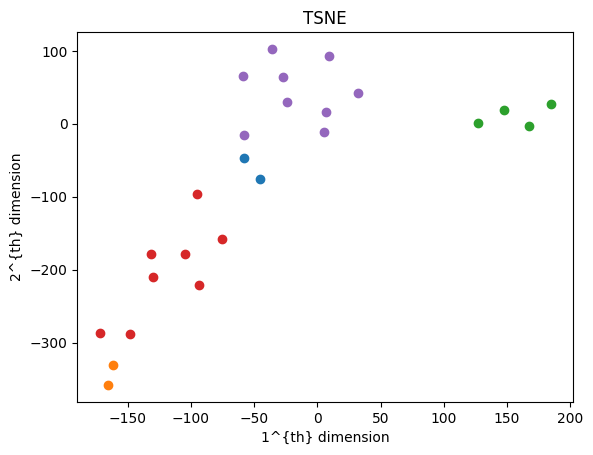

In [39]:
Y1 = method1.fit_transform(sprotein_scaled)
for cluster in clusters:
  row_ix = where(y_kmeans == cluster)
  plt.scatter(Y1[row_ix, 0], Y1[row_ix, 1], label='Cluster '+ str(cluster))
plt.xlabel('1^{th} dimension')
plt.ylabel('2^{th} dimension')
plt.title('TSNE')